# Project 2: Choosing a Model for Predicting on Unseen Data



# Project Description

For Project 2 you will create a regression program and choose a model to predict the women’s Olympic 100-meter race record time for year **2024**. We will code the year of each race as we did in lecture 2.3. 

![caption](https://nianyil.people.clemson.edu/CPSC_4430/P2.jpg)


## Data File

A text file with the data is available on Canvas for the years 1928 through 2008 when the Olympics were held. The first line of the text file indicating there’re **m** lines of data and a **n** number of features (in this case, one). You need to write a code to read data from the file. You **can** use packages, such as **panda**, to load the data.

In [19]:
##############################################################################
#         TODO: Write the code for reading data from file                    #
##############################################################################
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np

def read_data(read_file):
    with open(read_file, 'r') as file:
        first_line = file.readline().strip().split()
        entries, features = int(first_line[0]), int(first_line[1])
         
        x, y = [], []
        for _ in range(entries):
            line = file.readline().strip().split()
            x.append(int(line[0])+1900)
            y.append(float(line[1]))
       
        return x, y, entries, features
    
x_values, y_values, entries, features = read_data("W100MTimes.txt")
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

## Pick the Best Model

Your project assignment is to compare four different models, linear, quadratic, cubic, and fourth. 

- $h_w(x) = w_0 + w_1x$
- $h_w(x) = w_0 + w_1x + w_2x^2$
- $h_w(x) = w_0 + w_1x + w_2x^2 + w_3x^3$
- $h_w(x) = w_0 + w_1x + w_2x^2 + w_3x^3 + w_4x^4$


In [20]:
##############################################################################
#                 TODO: Define the regression models                         #
##############################################################################
def calculate_weights(X, Y):
    X_transpose = np.transpose(X)
    X_transpose_X = np.dot(X_transpose, X)
    X_transpose_X_inverse = np.linalg.inv(X_transpose_X)
    X_transpose_y = np.dot(X_transpose, Y)
    w = np.dot(X_transpose_X_inverse, X_transpose_y)
    return w

def linear_model(x_values, y_values):
    X = np.vstack([np.ones(len(x_values)), x_values]).T
    Y = np.array(y_values).reshape(-1, 1)
    w = calculate_weights(X, Y)
    linear = [w[0] + w[1]*x for x in x_values]
    return linear, w

def quadratic_model(x_values, y_values):
    X = np.vstack([np.ones(len(x_values)), x_values, np.power(x_values, 2)]).T
    Y = np.array(y_values).reshape(-1, 1)
    w = calculate_weights(X, Y)
    quadratic = [w[0] + w[1]*x + w[2]*x**2 for x in x_values]
    return quadratic, w

def cubic_model(x_values, y_values):
    X = np.vstack([np.ones(len(x_values)), x_values, np.power(x_values, 2), np.power(x_values, 3)]).T
    Y = np.array(y_values).reshape(-1, 1)
    w = calculate_weights(X, Y)
    cubic = [w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3 for x in x_values]
    return cubic, w

def fourth_degree_model(x_values, y_values):
    X = np.vstack([np.ones(len(x_values)), x_values, np.power(x_values, 2), np.power(x_values, 3), np.power(x_values, 4)]).T
    Y = np.array(y_values).reshape(-1, 1)
    w = calculate_weights(X, Y)
    fourth = [w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3 + w[4]*x**4 for x in x_values]
    return fourth, w
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Next, you need to use <span style="color:red">**5-fold cross validation**</span> to pick out the best model for the prediction. You should present a chart of the error function $J$, similar to the one in the lecture (see below). You may need to use package like "**tabulate**" to print out the table.

```
                     Linear    Quadratic    Cubic    Fourth
-----------------  --------  -----------  -------  --------
1234                  10.25        24.25    12.25     23.25
5                     10.25        19.25    14.25     23.25
1235                  10.25        15.25    19.25     23.25
4                     10.25        10.25    20.25     23.25
1245                  10.25        24.25    12.25     23.25
3                     10.25        19.25    14.25     23.25
1345                  10.25        24.25    12.25     23.25
2                     10.25        19.25    14.25     23.25
2345                  10.25        24.25    12.25     23.25
1                     10.25        19.25    14.25     23.25
Mean for Training      0            0        0         0
Mean for Testing       0            0        0         0
```

You need to **plot** your training and testing $J$ with respect to the polynomial degree, similar to the one in the lecture.

In [21]:
##############################################################################
#                     TODO: 5-fold cross-validation                         #
##############################################################################
def calculate_error(X, Y, w):
    m = len(Y)
    difference = np.dot(X, w) - Y
    J = (1/m) * np.dot(difference.T, difference)
    return J[0][0]

def k_fold_cross_validation(x_values, y_values, k=5):
    data_size = len(x_values)
    fold_size = data_size // k
    results = []
    training_errors = []
    testing_errors = []

    for i in range(k):
        test_indices = list(range(i*fold_size, (i+1)*fold_size))
        train_indices = list(range(0, i*fold_size)) + list(range((i+1)*fold_size, data_size))

        x_train = [x_values[j] for j in train_indices]
        y_train = [y_values[j] for j in train_indices]
        x_test = [x_values[j] for j in test_indices]
        y_test = [y_values[j] for j in test_indices]

        # Train models using training data
        linear, linear_weights = linear_model(x_train, y_train)
        quadratic, quadratic_weights = quadratic_model(x_train, y_train)
        cubic, cubic_weights = cubic_model(x_train, y_train)
        fourth, fourth_weights = fourth_degree_model(x_train, y_train)

        # Define the X and Y matrices for each model
        Y_train = np.array(y_train).reshape(-1, 1)
        Y_test = np.array(y_test).reshape(-1, 1)

        X_train_linear = np.vstack([np.ones(len(x_train)), x_train]).T
        X_train_quadratic = np.vstack([np.ones(len(x_train)), x_train, np.power(x_train, 2)]).T
        X_train_cubic = np.vstack([np.ones(len(x_train)), x_train, np.power(x_train, 2), np.power(x_train, 3)]).T
        X_train_fourth = np.vstack([np.ones(len(x_train)), x_train, np.power(x_train, 2), np.power(x_train, 3), np.power(x_train, 4)]).T

        X_test_linear = np.vstack([np.ones(len(x_test)), x_test]).T
        X_test_quadratic = np.vstack([np.ones(len(x_test)), x_test, np.power(x_test, 2)]).T
        X_test_cubic = np.vstack([np.ones(len(x_test)), x_test, np.power(x_test, 2), np.power(x_test, 3)]).T
        X_test_fourth = np.vstack([np.ones(len(x_test)), x_test, np.power(x_test, 2), np.power(x_test, 3), np.power(x_test, 4)]).T

        # Calculate training errors
        linear_train_err = calculate_error(X_train_linear, Y_train, linear_weights)
        quadratic_train_err = calculate_error(X_train_quadratic, Y_train, quadratic_weights)
        cubic_train_err = calculate_error(X_train_cubic, Y_train, cubic_weights)
        fourth_train_err = calculate_error(X_train_fourth, Y_train, fourth_weights)

        # Calculate testing errors
        linear_test_err = calculate_error(X_test_linear, Y_test, linear_weights)
        quadratic_test_err = calculate_error(X_test_quadratic, Y_test, quadratic_weights)
        cubic_test_err = calculate_error(X_test_cubic, Y_test, cubic_weights)
        fourth_test_err = calculate_error(X_test_fourth, Y_test, fourth_weights)

        training_errors.append([linear_train_err, quadratic_train_err, cubic_train_err, fourth_train_err])
        testing_errors.append([linear_test_err, quadratic_test_err, cubic_test_err, fourth_test_err])

        train_folds = "".join([str(j+1) for j in range(k) if j != i])
        fold_representation = train_folds + "\n" + str(i+1)
        results.append([fold_representation, linear_test_err, quadratic_test_err, cubic_test_err, fourth_test_err])

    # Calculate mean errors
    mean_training_errors = np.mean(training_errors, axis=0)
    mean_testing_errors = np.mean(testing_errors, axis=0)

    results.append(["Mean for Training", mean_training_errors[0], mean_training_errors[1], mean_training_errors[2], mean_training_errors[3]])
    results.append(["Mean for Testing", mean_testing_errors[0], mean_testing_errors[1], mean_testing_errors[2], mean_testing_errors[3]])

    # Create table
    headers = ["", "Linear", "Quadratic", "Cubic", "Fourth"]
    print(tabulate(results, headers, tablefmt="grid"))
    
    # Create plot
    plot_errors(training_errors, testing_errors)
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

In [22]:
##############################################################################
#                     TODO: Print out the table chart                       #
##############################################################################
# This method also prints the table!
def k_fold_cross_validation(x_values, y_values, k=5):
    data_size = len(x_values)
    fold_size = data_size // k
    results = []
    training_errors = []
    testing_errors = []

    for i in range(k):
        test_indices = list(range(i*fold_size, (i+1)*fold_size))
        train_indices = list(range(0, i*fold_size)) + list(range((i+1)*fold_size, data_size))

        x_train = [x_values[j] for j in train_indices]
        y_train = [y_values[j] for j in train_indices]
        x_test = [x_values[j] for j in test_indices]
        y_test = [y_values[j] for j in test_indices]

        # Train models using training data
        linear, linear_weights = linear_model(x_train, y_train)
        quadratic, quadratic_weights = quadratic_model(x_train, y_train)
        cubic, cubic_weights = cubic_model(x_train, y_train)
        fourth, fourth_weights = fourth_degree_model(x_train, y_train)

        # Define the X and Y matrices for each model
        Y_train = np.array(y_train).reshape(-1, 1)
        Y_test = np.array(y_test).reshape(-1, 1)

        X_train_linear = np.vstack([np.ones(len(x_train)), x_train]).T
        X_train_quadratic = np.vstack([np.ones(len(x_train)), x_train, np.power(x_train, 2)]).T
        X_train_cubic = np.vstack([np.ones(len(x_train)), x_train, np.power(x_train, 2), np.power(x_train, 3)]).T
        X_train_fourth = np.vstack([np.ones(len(x_train)), x_train, np.power(x_train, 2), np.power(x_train, 3), np.power(x_train, 4)]).T

        X_test_linear = np.vstack([np.ones(len(x_test)), x_test]).T
        X_test_quadratic = np.vstack([np.ones(len(x_test)), x_test, np.power(x_test, 2)]).T
        X_test_cubic = np.vstack([np.ones(len(x_test)), x_test, np.power(x_test, 2), np.power(x_test, 3)]).T
        X_test_fourth = np.vstack([np.ones(len(x_test)), x_test, np.power(x_test, 2), np.power(x_test, 3), np.power(x_test, 4)]).T

        # Calculate training errors
        linear_train_err = calculate_error(X_train_linear, Y_train, linear_weights)
        quadratic_train_err = calculate_error(X_train_quadratic, Y_train, quadratic_weights)
        cubic_train_err = calculate_error(X_train_cubic, Y_train, cubic_weights)
        fourth_train_err = calculate_error(X_train_fourth, Y_train, fourth_weights)

        # Calculate testing errors
        linear_test_err = calculate_error(X_test_linear, Y_test, linear_weights)
        quadratic_test_err = calculate_error(X_test_quadratic, Y_test, quadratic_weights)
        cubic_test_err = calculate_error(X_test_cubic, Y_test, cubic_weights)
        fourth_test_err = calculate_error(X_test_fourth, Y_test, fourth_weights)

        training_errors.append([linear_train_err, quadratic_train_err, cubic_train_err, fourth_train_err])
        testing_errors.append([linear_test_err, quadratic_test_err, cubic_test_err, fourth_test_err])

        train_folds = "".join([str(j+1) for j in range(k) if j != i])
        fold_representation = train_folds + "\n" + str(i+1)
        results.append([fold_representation, linear_test_err, quadratic_test_err, cubic_test_err, fourth_test_err])

    # Calculate mean errors
    mean_training_errors = np.mean(training_errors, axis=0)
    mean_testing_errors = np.mean(testing_errors, axis=0)

    results.append(["Mean for Training", mean_training_errors[0], mean_training_errors[1], mean_training_errors[2], mean_training_errors[3]])
    results.append(["Mean for Testing", mean_testing_errors[0], mean_testing_errors[1], mean_testing_errors[2], mean_testing_errors[3]])

    # Create table
    headers = ["", "Linear", "Quadratic", "Cubic", "Fourth"]
    print(tabulate(results, headers, tablefmt="grid"))
    
    # Create plot
    plot_errors(training_errors, testing_errors)
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

+-------------------+------------+-------------+------------+------------+
|                   |     Linear |   Quadratic |      Cubic |     Fourth |
+===================+============+=============+============+============+
| 2345              | 0.0864472  |  0.388056   | 1.4192     | 1.96348    |
| 1                 |            |             |            |            |
+-------------------+------------+-------------+------------+------------+
| 1345              | 0.0537807  |  0.0923945  | 0.135537   | 0.160014   |
| 2                 |            |             |            |            |
+-------------------+------------+-------------+------------+------------+
| 1245              | 0.0906473  |  0.0520156  | 0.0611714  | 0.0586245  |
| 3                 |            |             |            |            |
+-------------------+------------+-------------+------------+------------+
| 1235              | 0.00951639 |  0.00331133 | 0.00705073 | 0.00480152 |
| 4                 |    

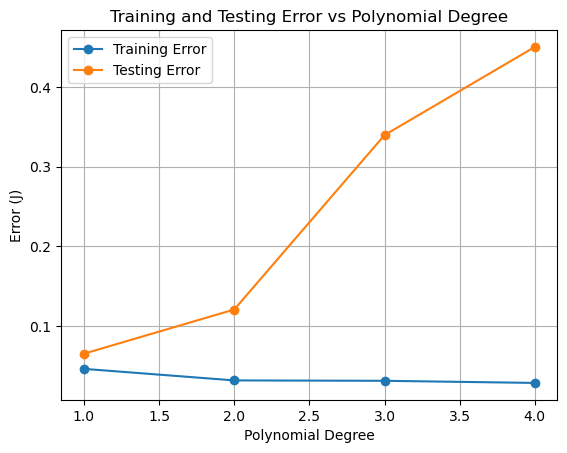

In [23]:
##############################################################################
#                     TODO: Plot the J curve                                 #
##############################################################################
def plot_errors(training_errors, testing_errors):
    # Calculate mean errors
    mean_training_errors = np.mean(training_errors, axis=0)
    mean_testing_errors = np.mean(testing_errors, axis=0)
    
    # Plotting the training and testing J with respect to the polynomial degree
    degrees = [1, 2, 3, 4]
    plt.figure()
    plt.plot(degrees, mean_training_errors, marker='o', label='Training Error')
    plt.plot(degrees, mean_testing_errors, marker='o', label='Testing Error')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('Error (J)')
    plt.title('Training and Testing Error vs Polynomial Degree')
    plt.legend()
    plt.grid(True)
    plt.show()

def k_fold_cross_validation(x_values, y_values, k=5):
    data_size = len(x_values)
    fold_size = data_size // k
    results = []
    training_errors = []
    testing_errors = []

    for i in range(k):
        test_indices = list(range(i*fold_size, (i+1)*fold_size))
        train_indices = list(range(0, i*fold_size)) + list(range((i+1)*fold_size, data_size))

        x_train = [x_values[j] for j in train_indices]
        y_train = [y_values[j] for j in train_indices]
        x_test = [x_values[j] for j in test_indices]
        y_test = [y_values[j] for j in test_indices]

        # Train models using training data
        linear, linear_weights = linear_model(x_train, y_train)
        quadratic, quadratic_weights = quadratic_model(x_train, y_train)
        cubic, cubic_weights = cubic_model(x_train, y_train)
        fourth, fourth_weights = fourth_degree_model(x_train, y_train)

        # Define the X and Y matrices for each model
        Y_train = np.array(y_train).reshape(-1, 1)
        Y_test = np.array(y_test).reshape(-1, 1)

        X_train_linear = np.vstack([np.ones(len(x_train)), x_train]).T
        X_train_quadratic = np.vstack([np.ones(len(x_train)), x_train, np.power(x_train, 2)]).T
        X_train_cubic = np.vstack([np.ones(len(x_train)), x_train, np.power(x_train, 2), np.power(x_train, 3)]).T
        X_train_fourth = np.vstack([np.ones(len(x_train)), x_train, np.power(x_train, 2), np.power(x_train, 3), np.power(x_train, 4)]).T

        X_test_linear = np.vstack([np.ones(len(x_test)), x_test]).T
        X_test_quadratic = np.vstack([np.ones(len(x_test)), x_test, np.power(x_test, 2)]).T
        X_test_cubic = np.vstack([np.ones(len(x_test)), x_test, np.power(x_test, 2), np.power(x_test, 3)]).T
        X_test_fourth = np.vstack([np.ones(len(x_test)), x_test, np.power(x_test, 2), np.power(x_test, 3), np.power(x_test, 4)]).T

        # Calculate training errors
        linear_train_err = calculate_error(X_train_linear, Y_train, linear_weights)
        quadratic_train_err = calculate_error(X_train_quadratic, Y_train, quadratic_weights)
        cubic_train_err = calculate_error(X_train_cubic, Y_train, cubic_weights)
        fourth_train_err = calculate_error(X_train_fourth, Y_train, fourth_weights)

        # Calculate testing errors
        linear_test_err = calculate_error(X_test_linear, Y_test, linear_weights)
        quadratic_test_err = calculate_error(X_test_quadratic, Y_test, quadratic_weights)
        cubic_test_err = calculate_error(X_test_cubic, Y_test, cubic_weights)
        fourth_test_err = calculate_error(X_test_fourth, Y_test, fourth_weights)

        training_errors.append([linear_train_err, quadratic_train_err, cubic_train_err, fourth_train_err])
        testing_errors.append([linear_test_err, quadratic_test_err, cubic_test_err, fourth_test_err])

        train_folds = "".join([str(j+1) for j in range(k) if j != i])
        fold_representation = train_folds + "\n" + str(i+1)
        results.append([fold_representation, linear_test_err, quadratic_test_err, cubic_test_err, fourth_test_err])

    # Calculate mean errors
    mean_training_errors = np.mean(training_errors, axis=0)
    mean_testing_errors = np.mean(testing_errors, axis=0)

    results.append(["Mean for Training", mean_training_errors[0], mean_training_errors[1], mean_training_errors[2], mean_training_errors[3]])
    results.append(["Mean for Testing", mean_testing_errors[0], mean_testing_errors[1], mean_testing_errors[2], mean_testing_errors[3]])

    # Create table
    headers = ["", "Linear", "Quadratic", "Cubic", "Fourth"]
    print(tabulate(results, headers, tablefmt="grid"))
    
    # Create plot
    plot_errors(training_errors, testing_errors)
    
k_fold_cross_validation(x_values, y_values)

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Based on your data and plot, you should then briefly discuss **which model is the best** for the record time prediction.

This results are very between the linear and quadratic models. While the linear model has a lower testing error the quadratic model has a lower training error. Although the numbers are small the testing error for quadratic is double that of the linear so for this reason I will say that linear may be the best model for this data. 

Next, compute the final weights of the best model utilizing the **complete data set**

In [24]:
##############################################################################
#              TODO: Calculate the final regression model                    #
##############################################################################
def compute_final_weights(x_values, y_values, model_type):
    # Convert x_values and y_values to appropriate numpy arrays
    X = np.array(x_values).reshape(-1, 1)
    Y = np.array(y_values).reshape(-1, 1)
    
    # Depending on the model_type, construct the X matrix with appropriate polynomial features
    if model_type == 'linear':
        X = np.hstack([np.ones((X.shape[0], 1)), X])
    elif model_type == 'quadratic':
        X = np.hstack([np.ones((X.shape[0], 1)), X, X**2])
    elif model_type == 'cubic':
        X = np.hstack([np.ones((X.shape[0], 1)), X, X**2, X**3])
    elif model_type == 'fourth':
        X = np.hstack([np.ones((X.shape[0], 1)), X, X**2, X**3, X**4])
    
    # Use the calculate_weights function to compute the final weights
    final_weights = calculate_weights(X, Y)
    
    return final_weights

best_model_type = "linear"

# Compute the final weights using the entire dataset
final_weights = compute_final_weights(x_values, y_values, best_model_type)

print(f"Final weights of the {best_model_type} model: w0={final_weights[0][0]}, w1={final_weights[1][0]}")
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Final weights of the linear model: w0=40.924154600696056, w1=-0.01507181223728793


## Prediction Using the Best Model

Write a Python program that takes a **year** as input, then outputs the winning women’s Olympic 100-meter **race time** for that year (round to two decimal places). You need to try and print out the results of **at least three different years**, and the final trial should output the race time of **2024**.

In [25]:
##############################################################################
#         TODO: Predict the race time using the best model                   #
##############################################################################
def predict_time(year, weights, model_type):
    # Using the model equation to predict the time
    if model_type == 'linear':
        return round((weights[0].item() + weights[1].item() * year), 2)
    elif model_type == 'quadratic':
        return round((weights[0].item() + weights[1].item() * year + weights[2].item() * year**2), 2)
    elif model_type == 'cubic':
        return round((weights[0].item() + weights[1].item() * year + weights[2].item() * year**2 + weights[3].item() * year**3), 2)
    elif model_type == 'fourth':
        return round((weights[0].item() + weights[1].item() * year + weights[2].item() * year**2 + weights[3].item() * year**3 + weights[4].item() * year**4), 2)

best_model_type = "linear"
# Predict the winning times for the specified years
years_to_predict = [1980, 2000, 2024]
for year in years_to_predict:
    predicted_time = predict_time(year, final_weights, best_model_type)
    print(f"The predicted winning time in the year {year} is {predicted_time} seconds")
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

The predicted winning time in the year 1980 is 11.08 seconds
The predicted winning time in the year 2000 is 10.78 seconds
The predicted winning time in the year 2024 is 10.42 seconds
